# CS412 - Machine Learning - 2023
## Homework 1
100 pts

## Software:

You may find the necessary function references here:

http://scikit-learn.org/stable/supervised_learning.html

When you search for KNeighborsClassifier for instance, you should find the relevant function and explained parameters, easily.

## Submission:
Fill this notebook. Write the report section at the end, removing the part in italics.

You should prepare a separate pdf document as your homework (name HW1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the **Share** button on top right).

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you click the Connect button from upper right.


In [ ]:
import random
import numpy as np

random.seed(412)
np.random.seed(412)

## 2) Load training dataset

*  Read MNIST dataset from Keras library.



In [ ]:
# this cell can be skipped at the running time
from keras.datasets import mnist
(X_train, Y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##3) Reshape the MNIST data

  In order to use images as input data for the sklearn k-NN classifier, the 2D image arrays need to be reshaped into a 1D arrays (in other words, a feature vector).

In [ ]:
print('Before reshaping: ', X_train.shape, X_test.shape)

Before reshaping:  (60000, 28, 28) (10000, 28, 28)


In [ ]:
N_train, height, width = X_train.shape

X_train = np.reshape(X_train, (N_train, height*width)) # from array of shape N_train x 28 x 28 ---> N_train x 784 (Note: 28*28 = 784)
X_test = np.reshape(X_test, (len(X_test), height*width)) # from array of shape N_test x 28 x 28 ---> N_test x 784

In [ ]:
print('After reshaping: ', X_train.shape, X_test.shape)

After reshaping:  (60000, 784) (10000, 784)


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%)

In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data

indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]


# Split %80 train - 20% val
from sklearn.model_selection import train_test_split

X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, random_state=0)


##5) Train k-NN  classifier on development data and do model selection using the validation data


* Train a k-NN classifier (use the values specified in the homework PDF file, do not try other values) with the rest of the parameters set to default.

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1,3,5,7,9,11,13]   # <--- Fill the list with the values for n_neighbors

best_acc = -1
best_k = None
val_accs = []
for k in k_values:
  model_knn = KNeighborsClassifier(n_neighbors = k) # 1) initialize a k-NN classifier with n_neighbors parameter set to k
  model_knn.fit(X_dev, Y_dev) # 2) train the classifier using training set
  Y_pred = model_knn.predict(X_val) # 3) get the predictions of the classifier on the validation set
  acc = accuracy_score(y_true = Y_val, y_pred = Y_pred) # 4) compute the accuracy of the predictions on the validation set and append it to val_accs list
  val_accs.append(acc)
  print('Validation accuracy for k=', k, ' :', acc)
  if(acc>best_acc): # if validation accuracy is better than best_acc, update best_acc and best_k
    best_acc = acc
    best_k = k


print('Best validation accuracy (', best_acc, ') is achieved with k=', best_k)

Validation accuracy for k= 1  : 0.9721666666666666
Validation accuracy for k= 3  : 0.97125
Validation accuracy for k= 5  : 0.9695
Validation accuracy for k= 7  : 0.96925
Validation accuracy for k= 9  : 0.9676666666666667
Validation accuracy for k= 11  : 0.9665
Validation accuracy for k= 13  : 0.9661666666666666
Best validation accuracy ( 0.9721666666666666 ) is achieved with k= 1


## 6) Plot the obtained validation accuracies versus k values

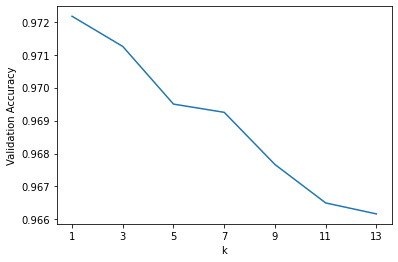

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, val_accs)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

## 7) Test your classifier on test set

- Now that you have the best value for the ***n_neighbors*** parameter, train a model **with best parameters that you have found according to your validation results**. But now, train the model by combining the training and validation sets. Then report the accuracy on the test set.

In [ ]:
final_model = KNeighborsClassifier(n_neighbors = best_k) # 1) initialize a k-NN classifier with n_neighbors parameter set to best_k
X_train_val = np.concatenate((X_train, X_val)) # 2) combine the training and validation sets (you may want to look up numpy.concatenate function for this)
y_train_val = np.concatenate((Y_train, Y_val))
final_model.fit(X_train_val, y_train_val) # 3) train the classifier using this set
y_pred = final_model.predict(X_test) # 4) get the predictions of the classifier on the test set
acc = accuracy_score(y_true = y_test, y_pred = y_pred)# 5) compute the accuracy of the predictions on the test set
print('Test accuracy for k=', best_k, ' :', acc)


# Report your result

#report is on both pdf and below

Test accuracy for k= 1  : 0.9691


##8) Report your results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what kNN is or what MNIST is, assuming they are known to people in your research area).

**Ahmet Alperen GUNGOR - 28847 - HW1 REPORT**

In this task, our aim is to implement a classifier for MNIST dataset using k-NN algorithm. While
doing so, we need to train the model with training set, then tune the hyperparameters using validation
set.
The dataset has 60000 training and 10000 test data, with 28x28 = 784 features. The training set
will be further divided into 2 parts: %80 development (which will be used to initially train the data) and
%20 validation (which will be used to tune hyperparameters – which is number of neighbors, K).
Parameters that we tried to tune number of K are [1,3,5,7,9,11,13] and the accuracies (using
validation data) are given below in a table:

K parameter 1 3 5 7 9 11 13

Accuracy 0.9721 0.9712 0.9695 0.9692 0.9676 0.9665 0.9661

As it can be seen from the table, k=1 has the highest accuracy on validation set with an accuracy
of 0.9721. Setting the number of neighbor parameter as 1 (the k=1 hyperparameter), k-NN classifier
model is then trained again, but using combined training (development) and validation set. The accuracy
of this model on the test set is 0.9691
